# import data

In [1]:
import matplotlib
import pandas as pd
import glob
from tqdm.notebook import tqdm

In [2]:
matplotlib.rc('font', family='Meiryo')

In [3]:
channels = dict()
for fn in glob.glob('chats/*.csv'):
    df = pd.read_csv(fn, index_col='Date', parse_dates=True)
#     print(fn)
    channel = fn.split(' - ')[2].split(' ')[0]
#     print(channel)
    if channel not in channels:
        channels[channel] = df
    else:
        channels[channel] = channels[channel].append(df)
    
    if df.shape[1] != 5:
        print(fn)

# Everything

In [4]:
channels['dont'].loc['2016']

,AuthorID,Author,Content,Attachments,Reactions
Date,,,,,
2016-04-26 20:08:00,173839815400357888,fops#1969,join the voice channel,NaN,📌 (1)
2016-04-26 20:09:00,173839815400357888,fops#1969,join the voice chat,NaN,NaN
2016-04-26 20:09:00,173839815400357888,fops#1969,on the lft,NaN,NaN
2016-04-26 20:22:00,173839815400357888,fops#1969,NaN,https://cdn.discordapp.com/attachments/1738400...,NaN
2016-04-26 20:29:00,173978157349601283,bebenebenebeb#8098,;,NaN,NaN
...,...,...,...,...,...
2016-12-30 21:35:00,174672596275691521,El Jefe#5223,RIP KIAN,NaN,NaN
2016-12-30 21:35:00,174672596275691521,El Jefe#5223,come back,NaN,NaN
2016-12-30 22:01:00,173839815400357888,fops#1969,https://www.youtube.com/watch?v=UVcFgswd1Sc,NaN,NaN


In [5]:
everything = pd.DataFrame()

In [6]:
for channel, df in channels.items():
    df['Channel'] = channel
    everything = pd.concat([everything, df])

In [7]:
everything = everything.sort_index(kind='mergesort') # mergesort is the only stable algo

## When did everyone join the server? (2017 and on)

In [8]:
join_msgs = everything[everything['Content'] == 'Joined the server.']
join_msgs.head(20)

,AuthorID,Author,Content,Attachments,Reactions,Channel
Date,,,,,,
2017-11-09 20:36:00,378335885000966144,God#9608,Joined the server.,NaN,NaN,do
2017-11-09 20:57:00,119482224713269248,Lindsey#2249,Joined the server.,NaN,NaN,do
2017-11-09 21:09:00,269585648954900483,Russell#0104,Joined the server.,NaN,NaN,do
2017-12-04 23:47:00,387462066396725269,TewLewdBot#4649,Joined the server.,NaN,NaN,do
2017-12-13 20:29:00,390673150863605760,TewLoudBot#2158,Joined the server.,NaN,NaN,do
2017-12-24 19:51:00,287408212318355458,walnut#4682,Joined the server.,NaN,NaN,do
2017-12-25 00:10:00,231604449297039370,SilentKON#2259,Joined the server.,NaN,NaN,do
2017-12-27 11:58:00,389275127608770560,honeynut#6170,Joined the server.,NaN,NaN,do
2018-01-06 17:51:00,398535009734098944,MrGreekGuy#8958,Joined the server.,NaN,NaN,do


No join msgs

In [9]:
no_join_msgs = everything[everything['Content'] != 'Joined the server.']
no_join_msgs = no_join_msgs.sort_values(by='Date', ascending=True, kind='mergesort')
no_join_msgs

,AuthorID,Author,Content,Attachments,Reactions,Channel
Date,,,,,,
2016-04-26 20:08:00,173839815400357888,fops#1969,join the voice channel,NaN,📌 (1),dont
2016-04-26 20:09:00,173839815400357888,fops#1969,join the voice chat,NaN,NaN,dont
2016-04-26 20:09:00,173839815400357888,fops#1969,on the lft,NaN,NaN,dont
2016-04-26 20:22:00,173839815400357888,fops#1969,NaN,https://cdn.discordapp.com/attachments/1738400...,NaN,dont
2016-04-26 20:29:00,173978157349601283,bebenebenebeb#8098,;,NaN,NaN,dont
...,...,...,...,...,...,...
2021-04-03 16:53:00,173978157349601283,bebenebenebeb#8098,!get yoni,NaN,NaN,the-real-us
2021-04-03 16:53:00,497602687211143189,Us#0704,**Yoni**: He was a reminder.,NaN,NaN,the-real-us
2021-04-03 16:53:00,173978157349601283,bebenebenebeb#8098,!get yoni,NaN,NaN,the-real-us


## What is everyone's first ever message?

In [10]:
first_content = pd.DataFrame()

first_content = no_join_msgs.drop_duplicates(subset='AuthorID')
first_content.head(20)

,AuthorID,Author,Content,Attachments,Reactions,Channel
Date,,,,,,
2016-04-26 20:08:00,173839815400357888,fops#1969,join the voice channel,NaN,📌 (1),dont
2016-04-26 20:29:00,173978157349601283,bebenebenebeb#8098,;,NaN,NaN,dont
2016-04-27 20:44:00,174672596275691521,El Jefe#5223,😫,NaN,NaN,dont
2016-04-29 16:30:00,175705032161886208,noss#0773,FUCKING SHIT\nFUCK,NaN,NaN,dont
2016-05-07 19:05:00,178642836701446145,Duhiggles#6156,Poop.,NaN,NaN,dont
2016-07-21 00:47:00,205517186838691840,TheInfinity#3826,any of yall play hearthstone?,NaN,NaN,dont
2016-12-02 23:21:00,231604449297039370,SilentKON#2259,im fucked for big boy,NaN,NaN,dont
2017-02-21 16:21:00,265929995938037761,Chris63479#5104,https://www.youtube.com/watch?v=h96Vt2EUvqo,NaN,NaN,dont
2017-10-26 22:14:00,256553939800031233,Sharkwood#8876,STOP,NaN,NaN,dont


In [11]:
first_content[first_content['Author'] == 'SergeiLNL#8685']['Attachments'].tolist()

['https://cdn.discordapp.com/attachments/200852342667476992/698014786759294997/418074330514325514.png']

In [12]:
pd.set_option("display.max_rows", 100, "display.max_columns", None)
first_content

,AuthorID,Author,Content,Attachments,Reactions,Channel
Date,,,,,,
2016-04-26 20:08:00,173839815400357888,fops#1969,join the voice channel,NaN,📌 (1),dont
2016-04-26 20:29:00,173978157349601283,bebenebenebeb#8098,;,NaN,NaN,dont
2016-04-27 20:44:00,174672596275691521,El Jefe#5223,😫,NaN,NaN,dont
2016-04-29 16:30:00,175705032161886208,noss#0773,FUCKING SHIT\nFUCK,NaN,NaN,dont
2016-05-07 19:05:00,178642836701446145,Duhiggles#6156,Poop.,NaN,NaN,dont
...,...,...,...,...,...,...
2021-03-06 04:23:00,378163905165525002,EriAndo#5096,!p wasted night,NaN,NaN,spam「スパム」
2021-03-16 00:31:00,318082903164715008,elif#5004,https://twitter.com/i/status/1371634111173910533,NaN,upvote (1),league
2021-03-17 00:24:00,328531631784722432,min#1473,hello,NaN,NaN,chat「雑談」


## What was the first message in each channel?

In [13]:
first_msg_in_channel = pd.DataFrame()

first_msg_in_channel = no_join_msgs.drop_duplicates(subset='Channel')
first_msg_in_channel

,AuthorID,Author,Content,Attachments,Reactions,Channel
Date,,,,,,
2016-04-26 20:08:00,173839815400357888,fops#1969,join the voice channel,NaN,📌 (1),dont
2016-07-08 01:55:00,173978157349601283,bebenebenebeb#8098,FUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUCK,NaN,📌 (1),do
2017-11-10 21:22:00,173978157349601283,bebenebenebeb#8098,spotbam,NaN,NaN,spam
2017-12-17 22:18:00,173839815400357888,fops#1969,/r34 discord,NaN,NaN,no-pls
2018-10-04 23:52:00,173978157349601283,bebenebenebeb#8098,!get,NaN,NaN,the-real-us
2018-11-16 16:33:00,173978157349601283,bebenebenebeb#8098,!ping,NaN,NaN,dev
2019-03-20 00:19:00,196742230659170304,Yoni#3150,NaN,https://cdn.discordapp.com/attachments/5577800...,NaN,japan
2019-05-22 17:30:00,574750451564806144,Shigure#7773,NaN,NaN,NaN,lowlights
2019-06-01 22:00:00,175705032161886208,noss#0773,!r 10d10,NaN,NaN,dnd


In [14]:
first_msg_in_channel[['Channel']]

,Channel
Date,
2016-04-26 20:08:00,dont
2016-07-08 01:55:00,do
2017-11-10 21:22:00,spam
2017-12-17 22:18:00,no-pls
2018-10-04 23:52:00,the-real-us
2018-11-16 16:33:00,dev
2019-03-20 00:19:00,japan
2019-05-22 17:30:00,lowlights
2019-06-01 22:00:00,dnd


### How many first-channel-messages does everyone have?

In [15]:
first_msg_in_channel.value_counts('Author')

Author
bebenebenebeb#8098    10
El Jefe#5223           3
fops#1969              3
SilentKON#2259         2
Sharkwood#8876         1
Shigure#7773           1
Yoni#3150              1
noss#0773              1
dtype: int64

## How many messages have each member sent?

In [16]:
pd.options.plotting.backend = "matplotlib"

In [17]:
counts_by_channel = everything.groupby(['Channel', 'Author']).count()
counts_by_channel.loc['spam'].sort_values('AuthorID')

,AuthorID,Content,Attachments,Reactions
Author,,,,
walnut#4682,1,1,0,1
XxxOilBaron69xxX#1543,1,1,0,0
StoneyB#7329,1,1,0,0
misterwheatley#9001,1,1,0,0
lilbailz#4577,1,1,0,0
AltKkSlider#8841,3,3,0,0
ckiz#8641,3,3,0,0
Kyle#9706,3,3,0,0
lizard#4410,3,2,1,1


<AxesSubplot:ylabel='Author'>

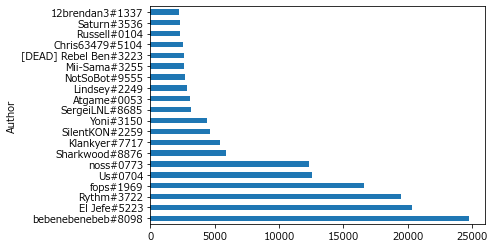

In [18]:
everything.value_counts(subset='Author').head(20).plot.barh()

### ...outside of spammy channels?

In [19]:
spam_channels = ['spam', 'spam「スパム」', 'dev', 'the-real-us', 'lowlights', 'voting', 'no-pls']
not_spammy = everything[ ~everything['Channel'].isin(spam_channels) ]
not_spammy.value_counts('Author')

Author
El Jefe#5223          12373
bebenebenebeb#8098    10886
fops#1969              9649
noss#0773              7486
Sharkwood#8876         4922
                      ...  
Shappell#1520             1
Chief#9806                1
AELR#6890                 1
Cobber#8143               1
SwervyKillz#9201          1
Length: 189, dtype: int64

<AxesSubplot:ylabel='Author'>

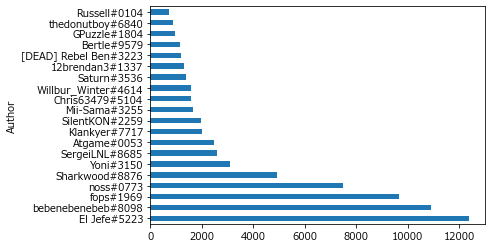

In [20]:
everything[ ~everything['Channel'].isin(spam_channels) ].value_counts('Author').head(20).plot.barh()

## How many messages have been sent in each channel?

In [21]:
everything.groupby('Channel').count().sort_values(by='Author')

,AuthorID,Author,Content,Attachments,Reactions
Channel,,,,,
come-on-and-slam,14,14,10,5,1
yonis-combine,91,91,91,0,8
whid-fieldtrip,149,149,145,4,14
lowlights,270,270,15,0,24
wiki,328,328,322,7,9
voting,720,720,666,3,22
admin,762,762,736,40,50
spam「スパム」,976,976,759,4,11
league,1045,1045,959,110,91


In [22]:
everything['Ones'] = 1

In [23]:
everything = everything.sort_index(kind='mergesort')
everything['Channel Msg Count'] = everything.groupby('Channel').cumcount()
everything

,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Date,,,,,,,,
2016-04-26 20:08:00,173839815400357888,fops#1969,join the voice channel,NaN,📌 (1),dont,1,0
2016-04-26 20:09:00,173839815400357888,fops#1969,join the voice chat,NaN,NaN,dont,1,1
2016-04-26 20:09:00,173839815400357888,fops#1969,on the lft,NaN,NaN,dont,1,2
2016-04-26 20:22:00,173839815400357888,fops#1969,NaN,https://cdn.discordapp.com/attachments/1738400...,NaN,dont,1,3
2016-04-26 20:29:00,173978157349601283,bebenebenebeb#8098,;,NaN,NaN,dont,1,4
...,...,...,...,...,...,...,...,...
2021-04-03 16:53:00,173978157349601283,bebenebenebeb#8098,!get yoni,NaN,NaN,the-real-us,1,21760
2021-04-03 16:53:00,497602687211143189,Us#0704,**Yoni**: He was a reminder.,NaN,NaN,the-real-us,1,21761
2021-04-03 16:53:00,173978157349601283,bebenebenebeb#8098,!get yoni,NaN,NaN,the-real-us,1,21762


In [24]:
everything = everything.sort_index(kind='mergesort')

### ...over time?

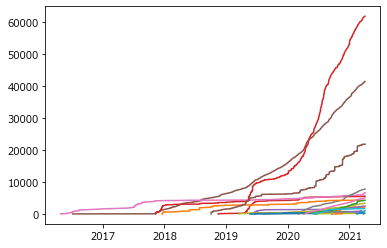

In [25]:
import matplotlib.pyplot as plt

for k,g in everything[['Channel','Channel Msg Count']].groupby('Channel'):
  plt.plot(g.index, g['Channel Msg Count'])

plt.show()



#### ...with a good legend?

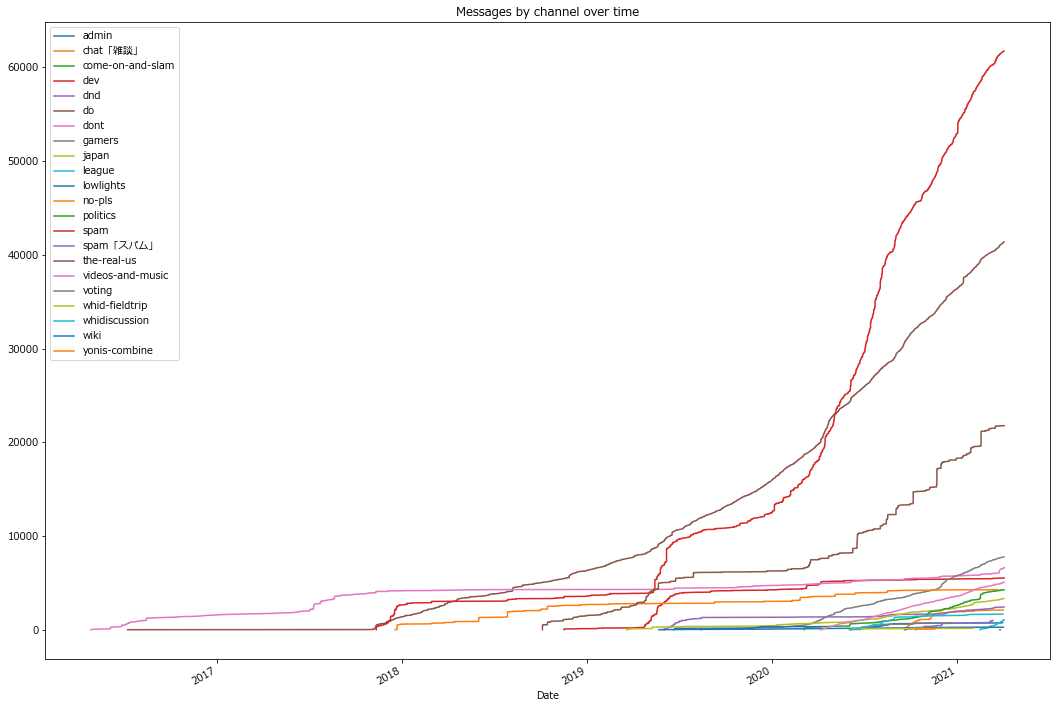

In [26]:
fig, ax = plt.subplots(figsize=(18,13))
for x, group in everything[['Channel','Channel Msg Count']].groupby('Channel'):
    group.plot(y='Channel Msg Count', title='Messages by channel over time', ax=ax, label=x,)

##### ...and a log-scale?

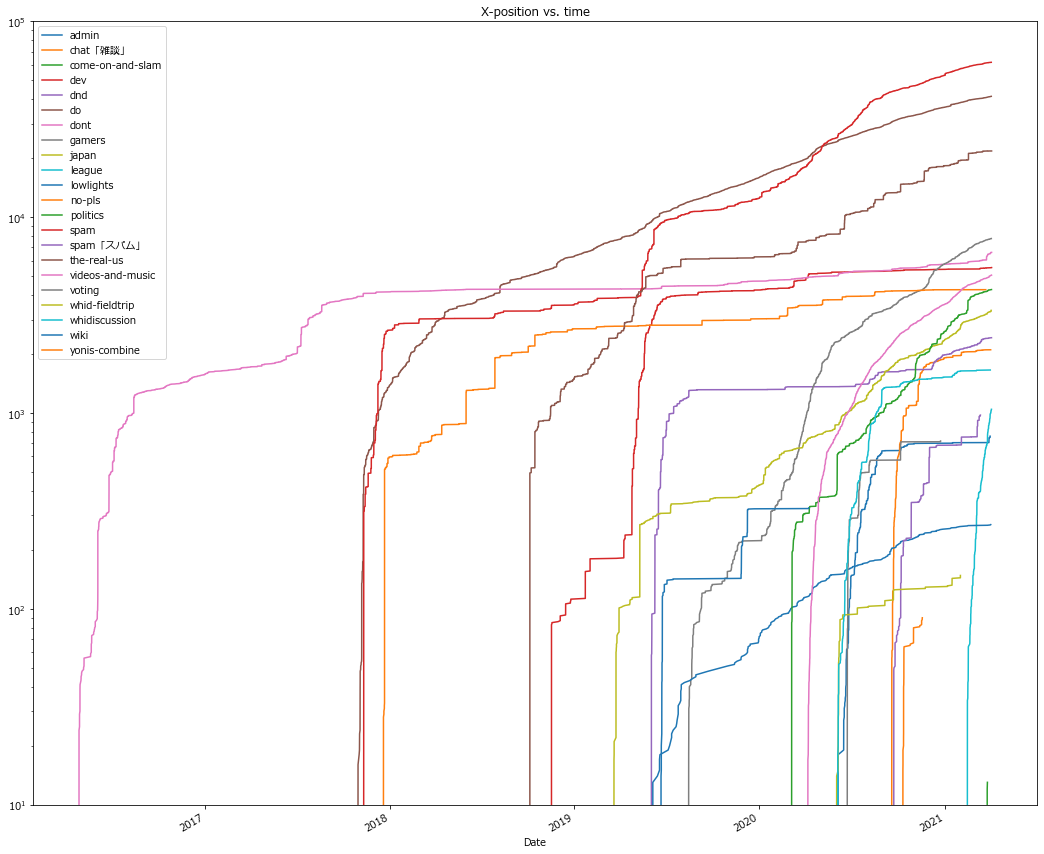

In [27]:
fig, ax = plt.subplots(figsize=(18,16))
for x, group in everything[['Channel','Channel Msg Count']].groupby('Channel'):
    group.plot(y='Channel Msg Count', title='X-position vs. time', ax=ax, label=x, logy=True, ylim=(10, 10**5))

### Can I have it in pie-chart form pls?

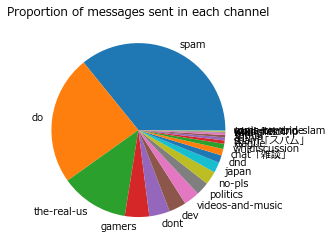

In [28]:
fig = plt.figure()
fig.patch.set_facecolor('white')
p = everything.value_counts('Channel').plot.pie(ylabel='', title='Proportion of messages sent in each channel')


### How about a nice lil' list?

In [29]:
everything.value_counts('Channel').head(10)

Channel
spam                61730
do                  41372
the-real-us         21765
gamers               7775
dont                 6608
dev                  5526
videos-and-music     5058
politics             4268
no-pls               4262
japan                3342
dtype: int64

### A barchart, maybe?

<AxesSubplot:xlabel='Channel'>

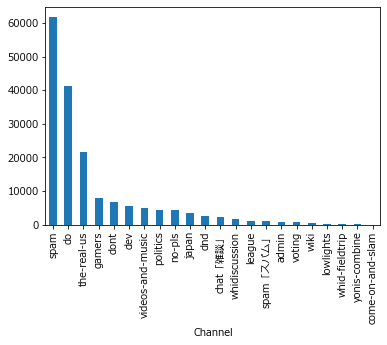

In [30]:
everything.value_counts('Channel').plot.bar()

## How many messages were sent?

### ...in each year?

<AxesSubplot:xlabel='Date'>

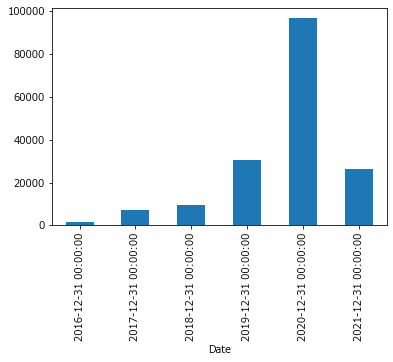

In [31]:
everything['Ones'].resample("Y").count().plot(kind='bar')

### ...in each month?

<AxesSubplot:xlabel='Date'>

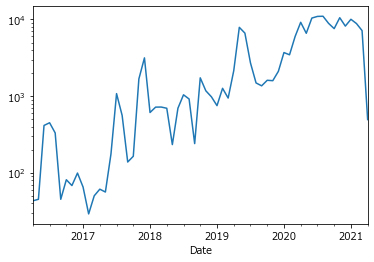

In [32]:
everything['Ones'].resample("M").count().plot(kind='line', logy=True)

## #do only had three messages in 2016.

In [33]:
everything.loc['2016'][everything.loc['2016']['Channel'] == 'do']

,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Date,,,,,,,,
2016-07-08 01:55:00,173978157349601283,bebenebenebeb#8098,FUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUCK,NaN,📌 (1),do,1,0
2016-07-08 20:57:00,173839815400357888,fops#1969,gg bois,NaN,NaN,do,1,1
2016-07-09 20:22:00,174672596275691521,El Jefe#5223,fuckin fucker fuck,NaN,NaN,do,1,2


# Wordplay

## How many unique words have been sent? How many total words?

In [34]:
import re
count = 0
words = dict()
for msg in everything['Content']:
    if type(msg) is float:
        continue
        
    msg_words = str(msg).lower().split(' ')
    count += len(msg_words)
    for word in msg_words:
        word = re.sub('[^a-z]+', '', word)
        if len(word) == 0:
            continue

        if word in words:
            words[word] += 1
        else:
            words[word] = 1
print('Number of unique words:', len(words))
print('Total number of words sent in all channels:', count)

Number of unique words: 43634
Total number of words sent in all channels: 896960


### ...outside of spammy channels?

In [35]:
import re
count = 0
words = dict()
for msg in everything[ ~everything['Channel'].isin(spam_channels) ]['Content']:
    if type(msg) is float:
        continue
        
    msg_words = str(msg).lower().split(' ')
    count += len(msg_words)
    for word in msg_words:
        word = re.sub('[^a-z]+', '', word)
        if len(word) == 0:
            continue

        if word in words:
            words[word] += 1
        else:
            words[word] = 1
print('Number of unique words:', len(words))
print('Total number of words sent :', count)

Number of unique words: 31680
Total number of words sent : 376743


## What are the most-sent words?

In [36]:
wordsdf = pd.DataFrame.from_dict(words, orient='index')
wordsdf.sort_values(by=0, ascending=False).head(10)

,0
the,9952
i,9450
a,6971
to,6564
you,5214
is,5020
and,4244
it,4130
of,3616
that,3597


In [37]:
wordss = pd.Series(words)
wordss

join                                  186
the                                  9952
voice                                  98
channel                               193
chat                                  143
                                     ... 
disappear                               1
httpswwwyoutubecomwatchvpflqavapq       1
httpsyoutubemsjbrevyuare                1
ferrous                                 3
httpsyoutubeqfevhyzbcq                  1
Length: 31680, dtype: int64

---

Initialize stopwords.

In [38]:
with open('stopwords.txt', 'r') as f:
    stopwords = f.read().split('\n')
print(len(stopwords))

142


## What are the most-sent non-stopword words?

In [39]:
wordss = wordss.drop(labels=stopwords, errors='ignore')
wordss.sort_values(ascending=False).head(40)[1:]

like             1713
get              1104
good             1094
el                974
one               932
fuck              819
ben               819
tristan           776
know              772
think             768
time              748
yeah              731
fops              726
jefe              721
oh                718
also              692
got               681
play              665
make              646
wyatt             614
people            614
want              608
ethan             604
shit              595
go                582
ill               569
yes               567
server            567
noss              565
new               558
guys              541
see               527
back              524
gonna             518
need              511
going             496
bebenebenebeb     493
u                 487
everyone          487
dtype: int64

In [40]:
wordss['wyatt']

614

In [41]:
wordss['ethan']

604

---

# Misc

Drop (most) non-emoji messages.

In [42]:
emoji_msgs = everything[everything['Content'].str.contains(':[a-zA-Z|-|~|0-9]+:', regex=True, na=False)]
emoji_msgs.head(10)

,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Date,,,,,,,,
2016-12-21 15:02:00,175705032161886208,noss#0773,http://www.ebay.com/itm/New-Nintendo-3DS-Anima...,NaN,NaN,dont,1,1548
2017-05-19 14:46:00,174672596275691521,El Jefe#5223,"Open me,-“:::::::/:::::|:::::|:::::::|:|::::::...",NaN,NaN,dont,1,1797
2017-05-19 14:46:00,174672596275691521,El Jefe#5223,"... ... ..',\,::|~--'-~\:::::::|: : : : : : |:...",NaN,👎 (1),dont,1,1798
2017-05-19 14:46:00,174672596275691521,El Jefe#5223,"... ... ... ... ..'\,: : : : : : : : : \: : : ...",NaN,NaN,dont,1,1799
2017-05-19 14:47:00,174672596275691521,El Jefe#5223,... ... ... .../: : : : : : : : : : : : : : : ...,NaN,👎 (1),dont,1,1800
2017-07-08 23:26:00,173839815400357888,fops#1969,e m o j i s ? ? ? :doggo1: :pizza:,NaN,NaN,dont,1,2192
2017-07-08 23:29:00,175705032161886208,noss#0773,:pizza:,NaN,NaN,dont,1,2193
2017-07-08 23:30:00,173839815400357888,fops#1969,:todhoward:,NaN,NaN,dont,1,2195
2017-07-09 00:48:00,175705032161886208,noss#0773,:todhoward: :todhoward: :todhoward: :todhoward...,NaN,NaN,dont,1,2197


In [43]:
import re
count = 0
emojis = dict()
for msg in emoji_msgs['Content']:
    if type(msg) is float:
        continue
        
    msg_words = str(msg).lower().split(' ')
    count += len(msg_words)
    for word in msg_words:
        if len(word) <= 1 or ':' not in word or '*' in word:
            continue

        if word in emojis:
            emojis[word] += 1
        else:
            emojis[word] = 1
print('Number of unique words:', len(words))
print('Total number of words sent :', count)

Number of unique words: 31680
Total number of words sent : 59322


## What are the most used emojis in messages?

In [44]:
emojis = pd.Series(emojis)
emojis = emojis[emojis > 6]
emojis.sort_values(ascending=False).head(100)

:youtube:           6384
:spotify:            813
:taco:               693
:yoooooo:            403
:gunright:           388
:scout:              297
:headout:            247
:kill:               218
:lfg:                214
:gunleft:            214
:trueshred:          176
:shred2:             162
:goopie:             161
:thumbsup:           158
:kale:               140
:shredward:          131
:joe:                129
:themeaning:         124
:thonk:              112
:iida:               108
:ethan:               98
:todhoward:           90
:sonervous:           88
:sonervous2:          84
:swastika:            83
:cheeto:              79
:cum:                 76
:hoodie:              74
:ethan3:              74
:bananna:             71
:cursedcostanza:      69
:imposterdance:       65
:high:                63
:pain:                58
:ahegao1:             56
:notlikethis:         52
:johndgemental:       50
:sword:               50
:wyatt2:              50
:shred:               49


In [45]:
import re
count = 0
emojis = dict()
for msg in emoji_msgs[ ~emoji_msgs['Channel'].isin(spam_channels) ]['Content']:
    if type(msg) is float:
        continue
        
    msg_words = str(msg).lower().split(' ')
    count += len(msg_words)
    for word in msg_words:
        if len(word) <= 1 or ':' not in word or '*' in word:
            continue

        if word in emojis:
            emojis[word] += 1
        else:
            emojis[word] = 1
print('Number of unique words:', len(words))
print('Total number of words sent :', count)

Number of unique words: 31680
Total number of words sent : 11847


### ...outside of spammy channels?

In [46]:
emojis = pd.Series(emojis)
emojis = emojis[emojis > 6]
emojis.sort_values(ascending=False).head(100)

:yoooooo:           403
:kill:              218
:lfg:               203
:gunright:          191
:trueshred:         174
:gunleft:           148
:shred2:            134
:goopie:            123
:iida:              108
:shredward:         107
:thonk:             100
:cheeto:             78
:ethan:              76
:scout:              74
:todhoward:          73
:swastika:           73
:cum:                70
:imposterdance:      65
:cursedcostanza:     64
:bananna:            60
:kale:               56
:hoodie:             52
:pain:               51
:ahegao1:            51
:shred:              49
:doubt2:             43
:joe:                41
:blunt:              40
:intensifeyes:       40
:sonervous:          40
:wyatt2:             37
:etikahype:          37
:wyatt3:             37
:drake:              35
:snek:               35
:dad:                35
:headout:            33
:speen:              33
:tristanfear:        32
:sword:              31
:blurryeyes:         31
:sonervous2:    

## How many times has shred.gif been sent?

In [47]:
# messages with shred as an attachment
everything[everything['Attachments'].str.contains('shred.gif', regex=False, na=False)].count()

AuthorID             32
Author               32
Content               3
Attachments          32
Reactions            11
Channel              32
Ones                 32
Channel Msg Count    32
dtype: int64

In [48]:
# messages with shred as a gif URL
everything[everything['Content'].str.contains('shred.gif', regex=False, na=False)].count()

AuthorID             225
Author               225
Content              225
Attachments            0
Reactions             30
Channel              225
Ones                 225
Channel Msg Count    225
dtype: int64

In [49]:
# both combined
everything[everything['Content'].str.contains('shred.gif', regex=False, na=False)].count() \
    + everything[everything['Attachments'].str.contains('shred.gif', regex=False, na=False)].count()

AuthorID             257
Author               257
Content              228
Attachments           32
Reactions             41
Channel              257
Ones                 257
Channel Msg Count    257
dtype: int64

# Multimedia

## How many videos have been sent?

In [188]:
c = everything['Content'].str
a = everything['Attachments'].str
au = everything.Author.str

yt_bot_mask = ~au.contains('Rythm#3722') & ~au.contains('Us#0704') & ~au.contains('bot') & ~au.contains('God#9608')
yt_mask = c.contains('youtube.com') & ~c.contains('play', na=False) & ~c.startswith('!', na=False) & yt_bot_mask

video_msgs = everything[ yt_mask | c.contains('.mp4') | a.contains('.mp4') ] 

In [195]:
video_msgs.sample(5)

,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Date,,,,,,,,
2016-12-06 21:57:00,173839815400357888,fops#1969,https://www.youtube.com/watch?v=fb4xGirFOq8,NaN,NaN,dont,1,1509
2019-06-22 00:52:00,175705032161886208,noss#0773,https://www.youtube.com/watch?v=rzKcrJ77wBY,NaN,NaN,dont,1,4398
2016-08-10 23:10:00,173839815400357888,fops#1969,https://www.youtube.com/watch?v=Mpa3z079iAA&ab...,NaN,NaN,dont,1,989
2017-06-30 01:03:00,175705032161886208,noss#0773,https://www.youtube.com/watch?v=oVjlJtATxvw,NaN,NaN,dont,1,2005
2020-05-30 12:03:00,173978157349601283,bebenebenebeb#8098,https://www.youtube.com/watch?v=_tg-LMfT-FQ,NaN,NaN,videos-and-music,1,752


In [196]:
len(video_msgs)

3016

## How many images have been sent?

In [221]:
c_m = c.contains('.png') | c.contains('.jpg') | c.contains('.jpeg')
a_m = a.endswith('.png') | a.endswith('.jpg') | a.endswith('.jpeg')

img_msgs = everything[ c_m | a_m ] 

In [222]:
img_msgs.sample(10)

,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Date,,,,,,,,
2019-06-07 00:31:00,256553939800031233,Sharkwood#8876,.magic,https://cdn.discordapp.com/attachments/3787311...,NaN,spam,1,8489
2021-01-08 22:16:00,175705032161886208,noss#0773,NaN,https://cdn.discordapp.com/attachments/2008523...,"pain (6),drake (3)",do,1,36787
2021-01-02 02:15:00,439205512425504771,NotSoBot#9555,NaN,https://cdn.discordapp.com/attachments/3787311...,NaN,spam,1,53512
2018-01-23 21:59:00,256553939800031233,Sharkwood#8876,NaN,https://cdn.discordapp.com/attachments/2008523...,NaN,do,1,1656
2020-10-12 22:49:00,196742230659170304,Yoni#3150,NaN,https://cdn.discordapp.com/attachments/2008523...,NaN,do,1,32203
2020-08-01 14:00:00,173839815400357888,fops#1969,NaN,https://cdn.discordapp.com/attachments/7179627...,NaN,whidiscussion,1,599
2020-06-05 22:00:00,173839815400357888,fops#1969,NaN,https://cdn.discordapp.com/attachments/5577800...,NaN,japan,1,873
2018-06-22 00:36:00,175705032161886208,noss#0773,NaN,https://cdn.discordapp.com/attachments/2008523...,NaN,do,1,3763
2021-02-25 16:47:00,158696080756703232,Saturn#3536,NaN,https://cdn.discordapp.com/attachments/6109924...,NaN,gamers,1,7101


### ...by people?

In [235]:
b_m = ~au.contains('Rythm#3722') & ~au.contains('Us#0704') & ~au.contains('bot', case=False) & ~au.contains('God#9608')
cmd_m = ~c.startswith('.', na=False)

image_people_msgs = everything[ (c_m | a_m) & b_m & cmd_m ]

In [242]:
image_people_msgs.sample(10)

,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Date,,,,,,,,
2020-08-06 01:13:00,262799048430452746,SergeiLNL#8685,NaN,https://cdn.discordapp.com/attachments/5577800...,NaN,japan,1,1283
2020-10-01 17:40:00,174672596275691521,El Jefe#5223,NaN,https://cdn.discordapp.com/attachments/5577800...,"gold (3),crimson (3)",japan,1,1854
2020-07-09 14:10:00,173839815400357888,fops#1969,Man,https://cdn.discordapp.com/attachments/6849289...,NaN,politics,1,718
2020-09-06 16:46:00,174672596275691521,El Jefe#5223,NaN,https://cdn.discordapp.com/attachments/6849289...,lfg (1),politics,1,1078
2020-04-23 12:57:00,174672596275691521,El Jefe#5223,I love Ohio,https://cdn.discordapp.com/attachments/2008523...,NaN,do,1,22291
2020-09-23 21:00:00,269585648954900483,Russell#0104,https://cdn.discordapp.com/attachments/7073238...,NaN,NaN,spam,1,44155
2020-06-28 13:06:00,219275160773984256,Mii-Sama#3255,NaN,https://cdn.discordapp.com/attachments/2008523...,😔 (3),do,1,25802
2021-01-26 01:37:00,184078144003768321,[DEAD] Rebel Ben#3223,https://cdn.discordapp.com/attachments/6848160...,NaN,NaN,gamers,1,6311
2020-10-31 17:47:00,174672596275691521,El Jefe#5223,NaN,https://cdn.discordapp.com/attachments/2008523...,NaN,do,1,33002


In [244]:
len(image_people_msgs)

11113

#### ...and who has sent the most?

In [246]:
image_people_msgs.groupby('Author').count().sort_values('AuthorID', ascending=False).head(10)

,AuthorID,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Author,,,,,,,
El Jefe#5223,1397,196,1396,361,1397,1397,1397
noss#0773,1381,115,1376,389,1381,1381,1381
Yoni#3150,1337,31,1332,178,1337,1337,1337
fops#1969,1199,268,1074,291,1199,1199,1199
bebenebenebeb#8098,1021,175,931,164,1021,1021,1021
Atgame#0053,694,24,678,541,694,694,694
Sharkwood#8876,448,25,444,110,448,448,448
SergeiLNL#8685,431,45,431,121,431,431,431
Mii-Sama#3255,385,66,381,93,385,385,385


## How many bot commands have been issued?

In [200]:
dollar = everything.Content.str.startswith('$')
exclaim = everything.Content.str.startswith('!')

In [210]:
everything[dollar | exclaim].sample(5)

,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Date,,,,,,,,
2020-12-02 01:14:00,173839815400357888,fops#1969,!move 5,NaN,NaN,spam,1,50184
2020-09-05 00:58:00,161144318160011265,Klankyer#7717,!get Klankyer,NaN,NaN,the-real-us,1,12998
2020-07-07 14:10:00,173978157349601283,bebenebenebeb#8098,$play shuddup,NaN,NaN,spam,1,31146
2020-08-16 02:34:00,173839815400357888,fops#1969,!get shigure,NaN,NaN,the-real-us,1,11855
2020-10-06 00:49:00,175705032161886208,noss#0773,!get noss,NaN,NaN,the-real-us,1,13953


In [211]:
len(everything[dollar | exclaim])

38176

In [213]:
38176/172040

0.22190188328295746

### ...and who has sent the most?

In [215]:
everything[dollar | exclaim].groupby('Author').count().sort_values('AuthorID', ascending=False)

,AuthorID,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Author,,,,,,,
bebenebenebeb#8098,9675,9675,5,508,9675,9675,9675
El Jefe#5223,5237,5237,0,73,5237,5237,5237
fops#1969,5113,5113,1,1011,5113,5113,5113
noss#0773,3781,3781,1,469,3781,3781,3781
Klankyer#7717,2974,2974,0,205,2974,2974,2974
SilentKON#2259,2013,2013,0,5,2013,2013,2013
Russell#0104,1392,1392,0,4,1392,1392,1392
Yoni#3150,1006,1006,0,9,1006,1006,1006
Saturn#3536,881,881,1,28,881,881,881


# @Mentions

## How many times have we used an @mention?

In [119]:
names = pd.Series(everything.Author.unique()).str.slice(stop=-5)

roles = ['majors', 'minors', 'international',
         'markwood', 'THE GOLDEN GOD',
         'dnd', 'programmer', 'classy', 'horizon walker', 'whidubber supreme', 'whidubber', 'cinnamon club',
         'among us', 'minecrafter', 'gaysex legends', 'terrarian', 'valorant', 'tarkov', 'destiny', 'call of duty', 'leg', 'puzzle master']

pings = ['everyone', 'here']

names

0               fops
1      bebenebenebeb
2            El Jefe
3               noss
4          Duhiggles
           ...      
186         BigDWH14
187       Kim Jah Un
188              min
189        Qwerty239
190        __lopunny
Length: 191, dtype: object

In [144]:
import re

mentionable = names.append(pd.Series(roles + pings), ignore_index=True)
mentionable = ['@' + re.escape(name) + '' for name in mentionable.values]
mentionable = [name.replace('/', '\/') for name in mentionable]

mentionable[5:10]

['@TheInfinity',
 '@SilentKON',
 '@Chris63479',
 '@Sharkwood',
 '@XxxOilBaron69xxX']

In [147]:
mention_count = pd.Series()

for msg in everything.Content:
    if type(msg) is not str: continue
    
    result = re.findall('|'.join(mentionable), msg)

    for mention in result:
        if mention in mention_count.index:
            mention_count[mention] += 1
        else:
            mention_count[mention] = 1

mention_count.sort_values(ascending=False)

<ipython-input-147-8c09d53a0f7c>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mention_count = pd.Series()


@fops                1109
@El Jefe              788
@bebenebenebeb        619
@noss                 617
@Saturn               349
                     ... 
@RightThumbAction       1
@ckiz                   1
@Parker                 1
@Juat a Loser           1
@Turbo Man!             1
Length: 122, dtype: int64

In [155]:

mention_count_notspam = pd.Series()

for msg in not_spam.Content:
    if type(msg) is not str: continue
    
    result = re.findall('|'.join(mentionable), msg)

    for mention in result:
        if mention in mention_count_notspam.index:
            mention_count_notspam[mention] += 1
        else:
            mention_count_notspam[mention] = 1

mention_count_notspam.sort_values(ascending=False)

<ipython-input-155-e7ab2670fd58>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mention_count_notspam = pd.Series()


@fops                  678
@El Jefe               614
@noss                  531
@bebenebenebeb         426
@Klankyer              243
@SilentKON             236
@everyone              218
@Atgame                212
@Chris63479            178
@Bertle                132
@Saturn                129
@whidubber             115
@Yoni                  114
@majors                 96
@Willbur_Winter         95
@Sharkwood              93
@horizon walker         92
@Mii-Sama               92
@12brendan3             86
@SergeiLNL              82
@[DEAD] Rebel Ben       70
@dnd                    66
@Mr. Sloan              60
@here                   60
@Russell                56
@min                    56
@call of duty           40
@GPuzzle                40
@Ross                   40
@thedonutboy            37
@tarkov                 35
@Qwerty239              30
@cinnamon club          28
@Lindsey                25
@lizard                 24
@Baru                   23
@Trickstr456            22
@

In [156]:
mention_count.sum()

7554

In [157]:
mention_count_notspam.sum()

5399

## How many times has @everyone been sent?

In [150]:
everything[everything['Content'].str.contains('@everyone', regex=False, na=False)].count()

AuthorID             278
Author               278
Content              278
Attachments           17
Reactions             76
Channel              278
Ones                 278
Channel Msg Count    278
dtype: int64

In [149]:
mention_count['@everyone']

281

In [158]:
mention_count_notspam['@everyone']

218

### Who has sent @everyone the most?

In [51]:
everything[everything['Content'].str.contains('@everyone', regex=False, na=False)].groupby('Author').count().sort_values(by='Content', ascending=False)

,AuthorID,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Author,,,,,,,
El Jefe#5223,63,63,4,27,63,63,63
Us#0704,56,56,0,2,56,56,56
noss#0773,42,42,6,13,42,42,42
SilentKON#2259,28,28,1,5,28,28,28
bebenebenebeb#8098,16,16,0,4,16,16,16
Atgame#0053,14,14,0,4,14,14,14
[DEAD] Rebel Ben#3223,11,11,1,5,11,11,11
Yoni#3150,9,9,1,4,9,9,9
Chris63479#5104,9,9,0,1,9,9,9


## Who has been @mentioned the most?

In [52]:
mentions = not_spammy[not_spammy['Content'].str.contains('@', regex=False, na=False)]
mentions.head(10)

,AuthorID,Author,Content,Attachments,Reactions,Channel
Date,,,,,,
2016-06-03 23:54:00,173978157349601283,bebenebenebeb#8098,@El Jefe,NaN,NaN,dont
2016-06-03 23:54:00,173978157349601283,bebenebenebeb#8098,@El Jefe bad,NaN,NaN,dont
2016-06-03 23:54:00,173978157349601283,bebenebenebeb#8098,@noss good,NaN,NaN,dont
2016-06-03 23:54:00,174672596275691521,El Jefe#5223,@bebenebenebeb,NaN,NaN,dont
2016-06-26 02:25:00,173978157349601283,bebenebenebeb#8098,@noss nobody said you cant combine them,NaN,NaN,dont
2017-07-01 13:16:00,174672596275691521,El Jefe#5223,@ethan,NaN,NaN,dont
2017-07-10 23:38:00,173839815400357888,fops#1969,@ban should I get an extra switch charging cable,NaN,NaN,dont
2017-07-10 23:39:00,173978157349601283,bebenebenebeb#8098,@ethan im gonna get the google pixel 18 watt c...,NaN,NaN,dont
2017-07-10 23:39:00,173978157349601283,bebenebenebeb#8098,@fops NO,NaN,NaN,dont


In [53]:
names = pd.Series(mentions.Author.unique()).str.slice(stop=-5)
names

0              bebenebenebeb
1                    El Jefe
2                       fops
3                  SilentKON
4                       noss
5                    Lindsey
6                 MrGreekGuy
7                  Sharkwood
8                     lizard
9                thedonutboy
10                  honeynut
11                FunnyMan18
12                    Saturn
13          [DEAD] Rebel Ben
14           tortellini1080p
15            Willbur_Winter
16                   GPuzzle
17                  Klankyer
18                Chris63479
19                      Yoni
20                    Bertle
21                12brendan3
22                  Mii-Sama
23                    Turtle
24                      Baru
25               Screenshare
26                   Russell
27                  Aplvan18
28                  Gladiate
29                    Atgame
30                   Shigure
31                   Joe1508
32                 Qwerty239
33                 SergeiLNL
34            

In [54]:
mentionable = ['@' + name for name in names]

mention_count = pd.Series()

for msg in mentions.Content:
    result = re.findall('|'.join(mentionable), msg)
    
    for mention in result:
        if mention in mention_count.index:
            mention_count[mention] += 1
        else:
            mention_count[mention] = 1

mention_count.sort_values(ascending=False)

<ipython-input-54-f26847a9a010>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mention_count = pd.Series()


@fops                 678
@El Jefe              614
@noss                 531
@bebenebenebeb        426
@Klankyer             243
@SilentKON            236
@Atgame               212
@Chris63479           178
@Bertle               132
@Saturn               129
@Yoni                 114
@Willbur_Winter        95
@Sharkwood             93
@Mii-Sama              92
@12brendan3            86
@SergeiLNL             82
@Mr. Sloan             60
@Russell               56
@Ross                  40
@GPuzzle               40
@thedonutboy           37
@Qwerty239             30
@Lindsey               25
@lizard                24
@Baru                  23
@Trickstr456           22
@Duhiggles             12
@honeynut               9
@MrGreekGuy             8
@Von                    8
@Gladiate               7
@Smoogle Translate      6
@Screenshare            6
@neco                   5
@Daru                   5
@SensualK               4
@Greenedar              2
@FunnyMan18             2
@W_ToXiiK   

### ..._including_ spammy channels?

In [55]:
mentionable = ['@' + name for name in names]

mention_count_spammy = pd.Series()

for msg in everything.Content:
    if type(msg) is not str:
        continue
    result = re.findall('|'.join(mentionable), msg)
    
    for mention in result:
        if mention in mention_count_spammy.index:
            mention_count_spammy[mention] += 1
        else:
            mention_count_spammy[mention] = 1

mention_count_spammy.sort_values(ascending=False)

<ipython-input-55-d6a0d2980409>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mention_count_spammy = pd.Series()


@fops                 1109
@El Jefe               788
@bebenebenebeb         619
@noss                  617
@Saturn                349
@SilentKON             312
@Klankyer              289
@Lindsey               285
@Atgame                268
@Chris63479            213
@12brendan3            160
@Yoni                  159
@Bertle                150
@Sharkwood             121
@Willbur_Winter        101
@Mii-Sama              100
@SergeiLNL              93
@Russell                84
@Mr. Sloan              75
@thedonutboy            52
@Qwerty239              44
@Ross                   43
@GPuzzle                42
@lizard                 28
@Baru                   24
@Trickstr456            23
@Duhiggles              15
@honeynut               11
@Gladiate               10
@Smoogle Translate      10
@Von                     9
@MrGreekGuy              9
@Screenshare             7
@Daru                    6
@neco                    5
@SensualK                4
@Shigure                 4
@

## Who is the person with the highest mention-to-message ratio?

In [56]:
mention_count_ratio = mention_count.copy()
mention_count_ratio.index = mention_count.index.str.slice(start=1)


msg_ratio = not_spammy.value_counts('Author')
msg_ratio.index = msg_ratio.index.str.slice(stop=-5)

ratio_df = pd.DataFrame(mention_count_ratio)
ratio_df['Mentions'] = ratio_df[0]
ratio_df = ratio_df.drop(0, axis=1)

_temp = pd.DataFrame(msg_ratio)
_temp['Messages'] = _temp[0]
_temp = _temp.drop(0, axis=1)

ratio_df = ratio_df.merge(_temp, how='left', left_index=True, right_index=True)
ratio_df['Ratio'] = ratio_df['Mentions'] / ratio_df['Messages']
ratio_df.describe()

,Mentions,Messages,Ratio
count,47.000000,47.000000,47.000000
mean,93.914894,1568.765957,0.306084
std,160.174338,2863.734095,0.936005
min,1.000000,1.000000,0.001399
25%,5.000000,41.000000,0.042090
50%,25.000000,445.000000,0.076818
75%,94.000000,1589.000000,0.117615
max,678.000000,12373.000000,5.000000


In [57]:
ratio_df[ratio_df.Messages > 7].sort_values('Ratio', ascending=False)

,Mentions,Messages,Ratio
Gladiate,7,29,0.241379
Duhiggles,12,51,0.235294
Lindsey,25,112,0.223214
Von,8,39,0.205128
Klankyer,243,2024,0.120059
SilentKON,236,1984,0.118952
neco,5,43,0.116279
Screenshare,6,52,0.115385
Bertle,132,1168,0.113014
Chris63479,178,1589,0.112020


In [58]:
ratio_df.loc['Qwerty239']

,Mentions,Messages,Ratio
Qwerty239,30,445,0.067416
Qwerty239,30,7,4.285714


# Bot commands

## Who uses `!play` the most?

In [59]:
everything[ everything['Content'].str.startswith('!play', na=False) ].groupby('Author').count().sort_values('Content', ascending=False)

,AuthorID,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Author,,,,,,,
fops#1969,2051,2051,1,6,2051,2051,2051
El Jefe#5223,832,832,0,0,832,832,832
Russell#0104,788,788,0,1,788,788,788
Saturn#3536,457,457,0,1,457,457,457
bebenebenebeb#8098,454,454,0,1,454,454,454
noss#0773,454,454,0,3,454,454,454
SilentKON#2259,432,432,0,0,432,432,432
Klankyer#7717,269,269,0,0,269,269,269
Yoni#3150,263,263,0,0,263,263,263


## Who uses `$play` the most?

In [60]:
everything[ everything['Content'].str.startswith('$play', na=False) ].groupby('Author').count().sort_values('Content', ascending=False)

,AuthorID,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count
Author,,,,,,,
bebenebenebeb#8098,2183,2183,0,1,2183,2183,2183
El Jefe#5223,1269,1269,0,1,1269,1269,1269
Klankyer#7717,909,909,0,0,909,909,909
Yoni#3150,502,502,0,0,502,502,502
noss#0773,483,483,0,1,483,483,483
fops#1969,359,359,0,4,359,359,359
[DEAD] Rebel Ben#3223,320,320,0,0,320,320,320
Sharkwood#8876,285,285,0,0,285,285,285
Chris63479#5104,195,195,0,1,195,195,195


In [61]:
botplot = everything.copy()

botplot = botplot[ botplot['Content'].str.startswith('$play', na=False) ]

botplot['playcount'] = botplot.groupby('Author').cumcount().values

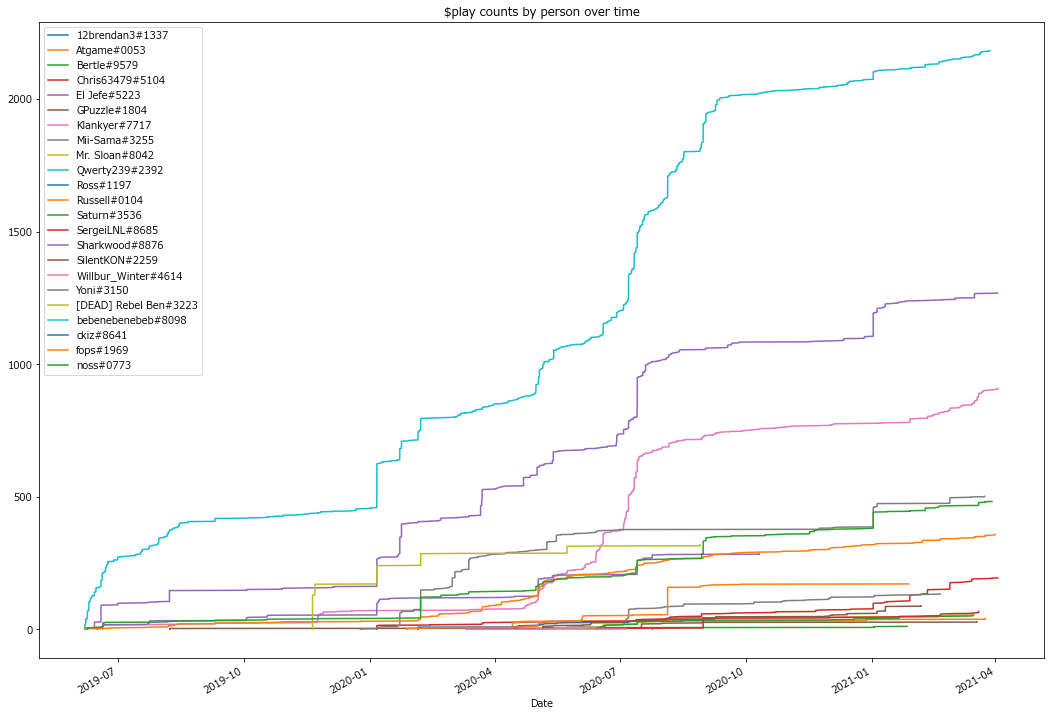

In [62]:
fig, ax = plt.subplots(figsize=(18,13))
for x, group in botplot[['Author','playcount']].groupby('Author'):
    group.plot(y='playcount', title='$play counts by person over time', ax=ax, label=x,)

# Reactions

In [63]:
reacts = pd.Series()

not_spam = everything[ ~everything['Channel'].isin(spam_channels) ]

for item in not_spam[not_spam['Reactions'].str.len() > 0]['Reactions']:
    for emote in item.split(','):
        emote, count = emote.split(' ')
        count = int(count.strip('()'))
        
        if emote in reacts.index:
            reacts[emote] += 1
        else:
            reacts[emote] = 1

<ipython-input-63-3229571aea41>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  reacts = pd.Series()


## What are the most used reactions outside of spam channels?

In [64]:
reacts.sort_values(ascending=False).head(20)

upvote          3242
downvote         851
lfg              470
🎲                414
📌                250
shredward        249
sonervous        214
drake            195
🇪                151
trueshred        145
allergies        145
👍                144
intensifeyes     135
cheeto           125
🇴                105
🇸                102
ahegao1           98
gunright          97
👀                 95
🇳                 95
dtype: int64

### How many times has :trueshred: and :shred: been used as reactions?

In [65]:
reacts['trueshred'] + reacts['shred']

176

In [66]:
reactions = everything.dropna(subset=['Reactions']).copy()


In [67]:
def get_react_dict(react_str):
    reacts = pd.Series()
    for emote in react_str.split(','):
        emote, count = emote.split(' ')
        count = int(count.strip('()'))
        
        if emote in reacts.index:
            reacts[emote] += count
        else:
            reacts[emote] = count
    return reacts

def get_react_count(row):
#     print(row)
    if type(row['Reactions']) is float:
        return 0
    dic = get_react_dict(row['Reactions'])
    return dic.sum()

In [68]:
reactions['React count'] = reactions.apply(get_react_count, axis=1, raw=False)


<ipython-input-67-cfdab38583d0>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  reacts = pd.Series()


## Which messages have the most total reactions?

In [69]:
sorted_reacts = reactions.sort_values('React count', ascending=False)
sorted_reacts

,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count,React count
Date,,,,,,,,,
2021-01-14 16:51:00,269585648954900483,Russell#0104,NaN,https://cdn.discordapp.com/attachments/2008523...,"lfg (7),upvote (8),❤️ (7),intensifeyes (7),wya...",do,1,37601,143
2021-01-25 22:18:00,231604449297039370,SilentKON#2259,NaN,https://cdn.discordapp.com/attachments/5577800...,"upvote (7),😱 (7),🥭 (7),YAMERO (7),😩 (7),🍔 (7),...",japan,1,2610,139
2020-08-06 01:12:00,262799048430452746,SergeiLNL#8685,NaN,https://cdn.discordapp.com/attachments/2008523...,"upvote (10),cheeto (9),⬛ (5),downvote (7),Down...",do,1,27948,133
2018-02-20 20:41:00,173839815400357888,fops#1969,https://i.imgur.com/yR8QNQ9.gifv,NaN,"😋 (6),🔜 (6),🤰 (6),🕺 (6),🍑 (6),🤺 (6),snek (6),k...",do,1,2155,119
2020-08-06 01:19:00,174672596275691521,El Jefe#5223,:downvote:,NaN,"votedown (17),downvote (15),downvote (15),down...",do,1,27957,117
...,...,...,...,...,...,...,...,...,...
2020-07-06 20:01:00,262799048430452746,SergeiLNL#8685,I love anime but at one point I felt that it w...,NaN,wyattPog (1),do,1,26185,1
2019-06-01 23:31:00,73486425349165056,GPuzzle#1804,!r 1d20+10,NaN,🎲 (1),dnd,1,25,1
2019-06-01 23:31:00,73486425349165056,GPuzzle#1804,!r 1d20+10,NaN,🎲 (1),dnd,1,27,1


In [70]:
sorted_reacts.head(5).Content.tolist()

[nan, nan, nan, 'https://i.imgur.com/yR8QNQ9.gifv', ':downvote:']

In [71]:
sorted_reacts.head(5).Attachments.tolist()

['https://cdn.discordapp.com/attachments/200852342667476992/799395222622699550/image0.jpg',
 'https://cdn.discordapp.com/attachments/557780039127793666/803463791831679017/image0.jpg',
 'https://cdn.discordapp.com/attachments/200852342667476992/740799450284425216/SPOILER_SPOILER_animecheeto.png',
 nan,
 nan]

Most reacted to messages:
    
1. russel sus https://discord.com/channels/173840048343482368/200852342667476992/799395222710648843
2. kian japanese porn https://discord.com/channels/173840048343482368/557780039127793666/803463791978217472
3. sergei "this is what men like, right?" cheeto https://discord.com/channels/173840048343482368/200852342667476992/740799450473299968
4. ethan gif https://discord.com/channels/173840048343482368/200852342667476992/415684468557479948
5. wyatt big downvote https://discord.com/channels/173840048343482368/200852342667476992/740801255676313671

## Which messages have the most upvotes?

In [72]:
def get_emoji_count(row, emoji):
    if type(row['Reactions']) is float:
        return 0
    dic = get_react_dict(row['Reactions'])
    return dic[dic.index.str.contains(emoji)].sum()

In [73]:
upvoted = sorted_reacts[sorted_reacts.Reactions.str.contains('upvote')].copy()
upvoted['Upvote count'] = upvoted.apply(get_emoji_count, axis=1, raw=False, args=('upvote', ))

<ipython-input-67-cfdab38583d0>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  reacts = pd.Series()


In [74]:
upvoted.sort_values('Upvote count', ascending=False, kind='mergesort').head(10)

,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count,React count,Upvote count
Date,,,,,,,,,,
2020-11-22 19:36:00,265929995938037761,Chris63479#5104,NaN,https://cdn.discordapp.com/attachments/2008523...,"upvote (10),upvote (7),lfg (7),cheeto (7),chee...",do,1,34180,66,17
2020-05-30 23:37:00,174672596275691521,El Jefe#5223,@everyone We are planning to do a WHID japan t...,NaN,"upvote (16),gold (5),PoggersRow (5),🗾 (5),walt...",do,1,24168,51,16
2021-01-11 21:06:00,316983477306261507,Atgame#0053,NaN,https://cdn.discordapp.com/attachments/2008523...,"upvote (14),📌 (1),⬛ (8),cactto (1)",do,1,36934,24,14
2020-10-03 04:14:00,749596345316278272,Lili리리#2910,:cheeto: desu,https://cdn.discordapp.com/attachments/7565157...,"upvote (13),📌 (2),👍 (1)",chat「雑談」,1,624,16,13
2020-12-28 03:00:00,158696080756703232,Saturn#3536,NaN,https://cdn.discordapp.com/attachments/2008523...,"upvote (13),📌 (1)",do,1,36273,14,13
2020-10-05 13:35:00,316983477306261507,Atgame#0053,@whidubber going to have a meeting at 8 pm to...,NaN,upvote (13),whidiscussion,1,1389,13,13
2020-08-29 15:46:00,316983477306261507,Atgame#0053,Who can make 11,NaN,upvote (13),whidiscussion,1,1177,13,13
2020-10-01 20:16:00,145730448105013248,12brendan3#1337,:cheeto::cheeto::cheeto::cheeto::cheetoPet:,NaN,"downvote (5),upvote (6),upvote (6),cheeto (7),...",do,1,31663,78,12
2020-04-14 00:11:00,196742230659170304,Yoni#3150,**VIDEO 2**,NaN,"upvote (12),downvote (8)",do,1,21112,20,12


Most upvoted messages:

1. chris we live in a cheeto https://discord.com/channels/173840048343482368/200852342667476992/780230368531709986
    * arguably this one is cheating because people upvoted twice
2. wyatt announces ill-fated plans https://discord.com/channels/173840048343482368/200852342667476992/716495454338023426
3. trent cheeto war https://discord.com/channels/173840048343482368/200852342667476992/798372346943635458

four way tie for 4th:

1. trent announces meeting for an ill-fated episode https://discord.com/channels/173840048343482368/717962705696456795/762729582398013460
2. trent sets the time for watching the final episode of whidubbed s1 https://discord.com/channels/173840048343482368/717962705696456795/749354242329804942
3. rob fucking kills tristan https://discord.com/channels/173840048343482368/200852342667476992/793025583193522186
4. Lili draws cheeto https://discord.com/channels/173840048343482368/756515787593744445/761863612905029684


## Which messages have the most cheeto reactions?

In [75]:
cheetoed = sorted_reacts[sorted_reacts.Reactions.str.contains('cheeto')].copy()
cheetoed['cheeto count'] = cheetoed.apply(get_emoji_count, axis=1, raw=False, args=('cheeto', ))
cheetoed.sort_values('cheeto count', ascending=False, kind='mergesort').head(10)

<ipython-input-67-cfdab38583d0>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  reacts = pd.Series()


,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count,React count,cheeto count
Date,,,,,,,,,,
2020-10-01 20:16:00,145730448105013248,12brendan3#1337,:cheeto::cheeto::cheeto::cheeto::cheetoPet:,NaN,"downvote (5),upvote (6),upvote (6),cheeto (7),...",do,1,31663,78,53
2020-09-10 16:55:00,312688758816505859,Qwerty239#2392,Dual wielding cheeto,NaN,"cheeto (8),cheeto (8),cheeto (8),⬛ (6),cheeto ...",do,1,29873,63,43
2020-11-22 19:36:00,265929995938037761,Chris63479#5104,NaN,https://cdn.discordapp.com/attachments/2008523...,"upvote (10),upvote (7),lfg (7),cheeto (7),chee...",do,1,34180,66,38
2020-09-25 15:31:00,702934736938467379,Ross#1197,Cheeto,NaN,"cheeto (4),cheeto (4),cheeto (4),cheeto (4),Ch...",do,1,31180,41,36
2020-12-09 15:25:00,173978157349601283,bebenebenebeb#8098,NaN,https://cdn.discordapp.com/attachments/2008523...,"flaminhot (5),Cheeto (5),cheeto (5),cheetoPet ...",do,1,35230,45,30
2021-03-23 12:35:00,275002179763306517,Bertle#9579,DID SOMEONE SAY :cheeto: !,NaN,"cheeto (6),cheeto (6),cheeto (6),cheeto (6),ch...",do,1,40778,30,30
2020-10-16 07:52:00,392000876702859266,YUCA#3923,:cheeto:,NaN,"cheeto (7),cheeto (4),cheeto (4),cheeto (4),ch...",chat「雑談」,1,967,23,23
2020-09-10 18:06:00,574750451564806144,Shigure#7773,NaN,NaN,"cheeto (3),cheeto (3),cheeto (3),cheeto (3),ch...",lowlights,1,188,24,21
2020-12-23 17:46:00,73486425349165056,GPuzzle#1804,NaN,https://cdn.discordapp.com/attachments/2008523...,"lfg (7),cheeto (7),cheeto (6),cheetoPet (5)",do,1,36071,25,18


Most cheeto-ed messages:

1. brendan has a litter https://discord.com/channels/173840048343482368/200852342667476992/761381145182863381
2. james dual wields https://discord.com/channels/173840048343482368/200852342667476992/753720453247533127
3. chris lives in a society (repeat from upvote) https://discord.com/channels/173840048343482368/200852342667476992/780230368531709986
4. Ross speaks out https://discord.com/channels/173840048343482368/200852342667476992/759135001647513620
5. ben is dramatic https://discord.com/channels/173840048343482368/200852342667476992/786327642592641045


## Which messages have the most shred reactions?

In [76]:
shredded = sorted_reacts[sorted_reacts.Reactions.str.contains('shred')].copy()
shredded['cheeto count'] = shredded.apply(get_emoji_count, axis=1, raw=False, args=('shred', )) - shredded.apply(get_emoji_count, axis=1, raw=False, args=('shredward', )) - shredded.apply(get_emoji_count, axis=1, raw=False, args=('shred2', ))
shredded.sort_values('cheeto count', ascending=False, kind='mergesort').head(10)

<ipython-input-67-cfdab38583d0>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  reacts = pd.Series()


,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count,React count,cheeto count
Date,,,,,,,,,,
2020-06-21 11:40:00,174672596275691521,El Jefe#5223,@everyone viewing party for whidubbed tonight ...,NaN,"trueshred (10),🇦 (3),🇲 (3)",whidiscussion,1,146,16,10
2020-09-04 23:13:00,316983477306261507,Atgame#0053,@everyone,NaN,trueshred (8),do,1,29583,8,8
2021-01-22 18:40:00,175705032161886208,noss#0773,@everyone,NaN,trueshred (8),videos-and-music,1,3985,8,8
2021-01-14 16:51:00,269585648954900483,Russell#0104,NaN,https://cdn.discordapp.com/attachments/2008523...,"lfg (7),upvote (8),❤️ (7),intensifeyes (7),wya...",do,1,37601,143,7
2021-03-15 17:48:00,588537739662852136,Mr. Sloan#8042,https://tenor.com/view/leopard-cheetah-hang-in...,NaN,"upvote (8),shredward (7),trueshred (7)",do,1,40433,22,7
2020-07-04 00:11:00,173978157349601283,bebenebenebeb#8098,https://media.discordapp.net/attachments/17384...,NaN,trueshred (7),do,1,26082,7,7
2020-06-16 01:47:00,231604449297039370,SilentKON#2259,@everyone There will be a whathaveidone Chess ...,NaN,"upvote (7),blunderYEEHAW (2),trueshred (6),blu...",do,1,25230,31,6
2021-03-23 13:21:00,175705032161886208,noss#0773,I am a very fortunate man to have friends like...,NaN,"trueshred (6),steve (4),stevespin (4),speen (4...",do,1,40783,22,6
2020-10-05 20:36:00,173839815400357888,fops#1969,NaN,https://cdn.discordapp.com/attachments/2008523...,"cheeto (8),upvote (8),trueshred (6)",do,1,31832,22,6


Most shredded messages:
    
1. wyatt throws a (viewing) party https://discord.com/channels/173840048343482368/717962705696456795/724287598016725052
2. trent pings everyone https://discord.com/channels/173840048343482368/200852342667476992/751641009124933803
3. tristan gets the spam rolling https://discord.com/channels/173840048343482368/696525349797888091/802321705368027196
4. russell sus again https://discord.com/channels/173840048343482368/200852342667476992/799395222710648843
5. Jackson hang in there tristan https://discord.com/channels/173840048343482368/200852342667476992/821137732834295850


## Which messages are the most downvoted?

In [77]:
downvoted = sorted_reacts[sorted_reacts.Reactions.str.contains('downvote')].copy()
downvoted['downvote count'] = downvoted.apply(get_emoji_count, axis=1, raw=False, args=('downvote', ))
downvoted.sort_values('downvote count', ascending=False, kind='mergesort').head(10)

<ipython-input-67-cfdab38583d0>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  reacts = pd.Series()


,AuthorID,Author,Content,Attachments,Reactions,Channel,Ones,Channel Msg Count,React count,downvote count
Date,,,,,,,,,,
2020-08-06 01:19:00,174672596275691521,El Jefe#5223,:downvote:,NaN,"votedown (17),downvote (15),downvote (15),down...",do,1,27957,117,75
2020-08-06 01:12:00,262799048430452746,SergeiLNL#8685,NaN,https://cdn.discordapp.com/attachments/2008523...,"upvote (10),cheeto (9),⬛ (5),downvote (7),Down...",do,1,27948,133,48
2020-07-23 21:54:00,174672596275691521,El Jefe#5223,@everyone do you wear underwear under your bat...,NaN,"upvote (6),downvote (14),shred (2),🌵 (2),authl...",do,1,27256,25,14
2020-04-14 00:11:00,196742230659170304,Yoni#3150,**VIDEO 2**,NaN,"upvote (12),downvote (8)",do,1,21112,20,8
2020-04-14 00:11:00,196742230659170304,Yoni#3150,**VIDEO 1**,NaN,"upvote (12),downvote (8)",do,1,21111,20,8
2020-04-14 00:11:00,196742230659170304,Yoni#3150,**VIDEO 3**,NaN,"upvote (12),downvote (8)",do,1,21113,20,8
2020-09-12 16:10:00,174672596275691521,El Jefe#5223,I hate Cheetos,NaN,"downvote (8),cheeto (1),cheeto (1),cheeto (1),...",do,1,29986,16,8
2021-03-18 21:22:00,262799048430452746,SergeiLNL#8685,@bebenebenebeb @noss @El Jefe @fops @12brendan...,NaN,"downvote (8),lfg (5),upvote (1)",do,1,40632,14,8
2021-01-28 18:52:00,174672596275691521,El Jefe#5223,William,NaN,"upvote (4),downvote (8)",politics,1,3152,12,8


# tfdif

In [78]:
# setup tfidf stuff
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(use_idf=True, stop_words='english')

# transform data
no_urls = everything[~everything['Content'].str.contains('http').fillna(True)]
no_urls['Content'] = no_urls['Content'].str.replace("\'", '')
no_urls

def join(x):
    return x.str.cat(sep=' \n ')

boxed = no_urls.groupby('Channel')
strs = boxed['Content'].aggregate(join)
strs

vecs = tfidf.fit_transform(strs)
vecs.shape

<ipython-input-78-7f06021f85ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_urls['Content'] = no_urls['Content'].str.replace("\'", '')


(22, 32961)

In [26]:
# do the actual math
vecs_df = dict()

for x, i_and_tf in enumerate(zip(strs.index, vecs)):
    i, tf = i_and_tf
    vecs_df[i] = pd.DataFrame(vecs[x].T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"]).sort_values(by=['tfidf'], ascending=False)

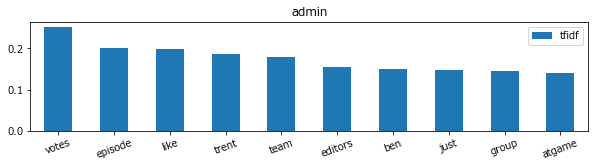

In [33]:
# plot
for i, df in vecs_df.items():
    df.head(10).plot(title=str(i), kind='bar', rot=20, figsize=(10,2))
    break # comment out to see whole thing

# plotly

In [150]:
import plotly
pd.options.plotting.backend = "plotly"

In [156]:
everything.value_counts(subset='AuthorID')


AuthorID
173978157349601283    23892
174672596275691521    19407
235088799074484224    19306
173839815400357888    15651
497602687211143189    12539
                      ...  
307792330101096449        1
290538227545407499        1
405685080577802240        1
284922044120956929        1
802674327266131968        1
Length: 189, dtype: int64

In [152]:
fig = everything.value_counts(subset='AuthorID').plot()
fig.show()